The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


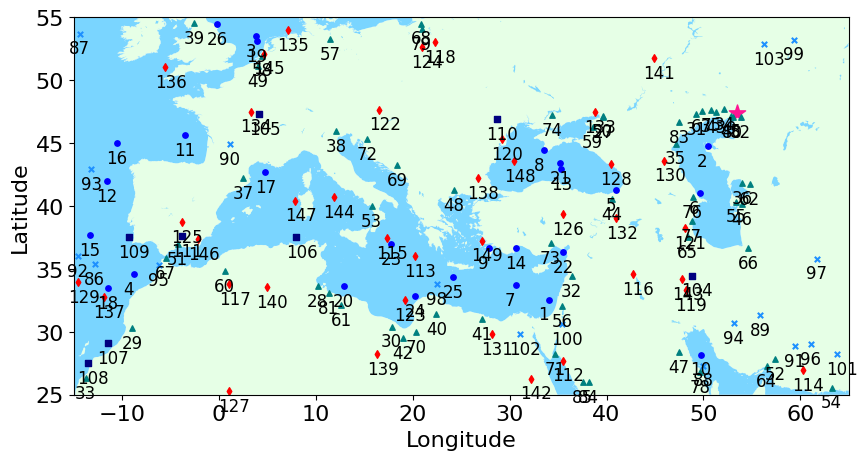

In [95]:
%load_ext autoreload
%autoreload 2

from ssir.pathfinder import astar, genetic
import ssir.environment as env

config = env.generate_config(0)
dm = env.DataManager(**config)
pm = env.PlotManager()
graph = dm.generate_master_graph()
pm.plot_dm(dm, verbose=True)

In [ ]:
costs, predecessors = astar.a_star(graph, metric="distance")
graph_astar_distance = astar.get_solution_graph(graph, predecessors)
print(f"A* distance throughput: {graph_astar_distance.compute_network_throughput()}")

costs, predecessors = astar.a_star(graph, metric="hop")
graph_astar_hop = astar.get_solution_graph(graph, predecessors)
print(f"A* hop throughput: {graph_astar_hop.compute_network_throughput()}")

graph_genetic, throughput_genetic = genetic.get_solution_graph(graph, verbose=True)

graph_list = [graph_astar_distance, graph_astar_hop, graph_genetic]

print(f"Genetic throughput: {graph_genetic.compute_network_throughput()}")
pm.plot_dm(dm, graph_list)

A* distance throughput: 0.1708226820915715
A* hop throughput: 2.174269022946498
[100/1000] Current fitness: -inf | Early-stopping count: 99         
Stopped early at generation 100 due to no improvement.


AttributeError: 'NoneType' object has no attribute 'compute_network_throughput'

In [ ]:
pm.plot_dm